# Hotel Rating Classification 

## Business Objective:
### T and major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.
    

In [1]:
pip install wordcloud 

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
pip install -U spacy

Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.8.7-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached thinc-8.3.6-cp39-cp39-win_amd64.whl (1.8 MB)
  Using cached blis-1.3.0.tar.gz (2.5 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pydantic-2.11.9-py3-none-any.whl (444 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl (14 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Using cached pydantic_core-2.33.2-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached confection-0.1.5-py3-none-any.whl (3

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [32 lines of output]
  BLIS_COMPILER? None
  C:\Users\bandh\AppData\Local\Temp\pip-build-env-t5b5ua01\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: BSD License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-39\blis
  copying blis\about.py -> build\lib.win-amd64-cpython-39\blis
  copying blis\benchmark.py -> build\lib.win-amd64-cpyth

In [4]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np
import string
import nltk
import spacy
#from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
nltk.download('stopwords')
import re
from nltk import pos_tag
import nltk

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\bandh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bandh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:

from pickle import dump
from sklearn.linear_model import LogisticRegression
from  sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [8]:
#loading hotel review excel file in python
data=pd.read_excel("hotel_reviews.xlsx")

In [9]:
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


### Data Understanding

In [10]:
data.shape

(20491, 2)

In [11]:
len(data)

20491

In [12]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


Maximum rating is 5
Minimum rating is 1
Average rating is 4

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [14]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [15]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

## Visualization

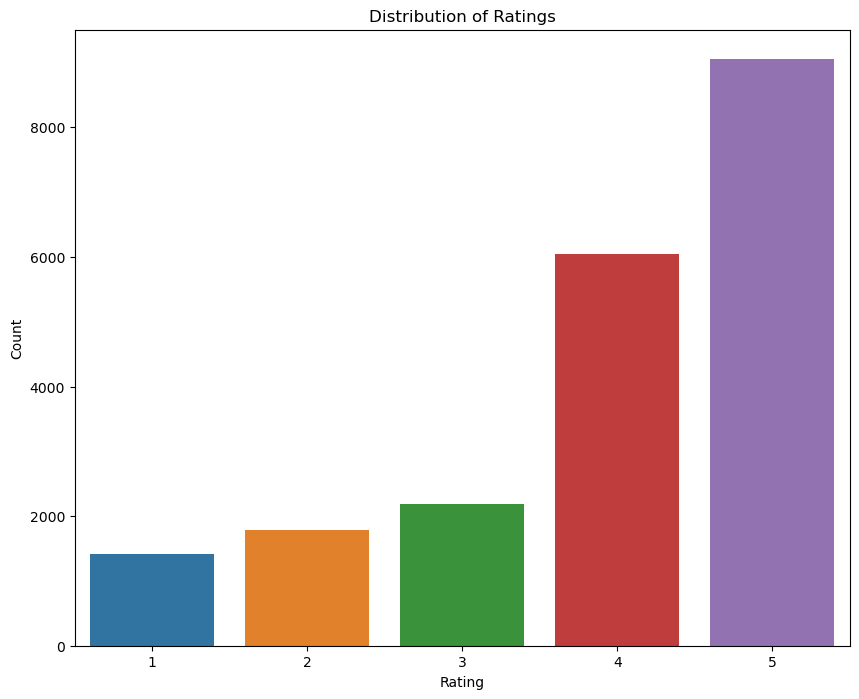

In [16]:
# Visualize the distribution of ratings
plt.figure(figsize=(10,8))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

1) More people have given 4 and  5 rating
2) comparitevely very  less people have given 1,2,3 rating

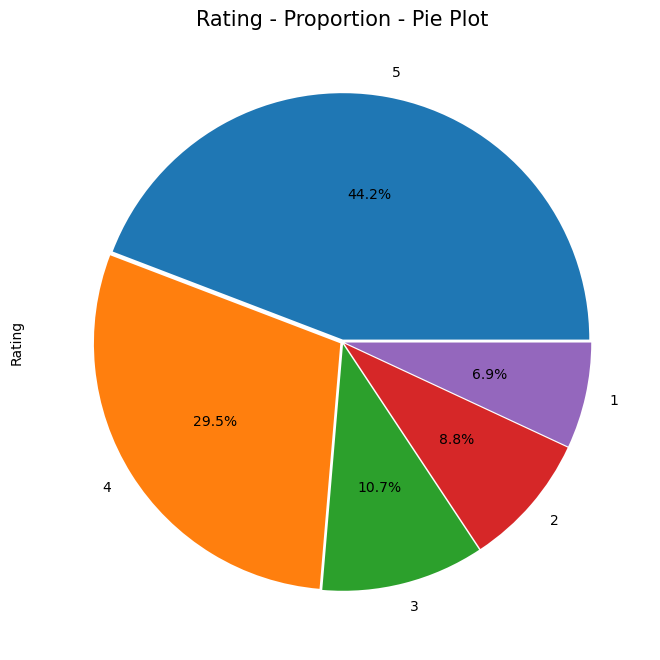

In [17]:
plt.figure(figsize=(8,8))
data.Rating.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Rating - Proportion - Pie Plot',size=15)
plt.show()

44.2 % of the people have given Rating 5

29.5% of the people have given Rating 4

10.7% of the people have given Rating 3

8.8% of the people have given Rating 2

Only 6.9 % of the people have given Rating 1

### Rating analysis

In [18]:
def rating_analysis(Rating):
    if Rating==1 or Rating==2:
        return 'Negative'
    elif Rating==4 or Rating==5:
        return 'Positive'
    else:
        return 'Neutral'

In [19]:
data['rating_analysis']=data['Rating'].apply(lambda x:rating_analysis(x)) 
data['rating_analysis'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: rating_analysis, dtype: int64

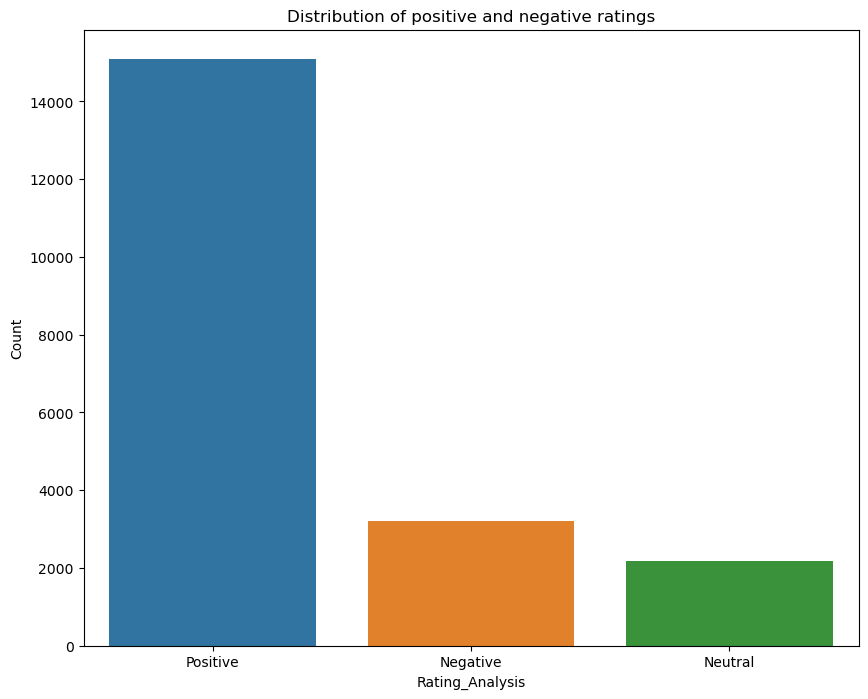

In [20]:
# Visualize the distribution of positive and negative ratings
plt.figure(figsize=(10,8))
sns.countplot(x='rating_analysis', data=data)
plt.title('Distribution of positive and negative ratings')
plt.xlabel('Rating_Analysis')
plt.ylabel('Count')
plt.show()

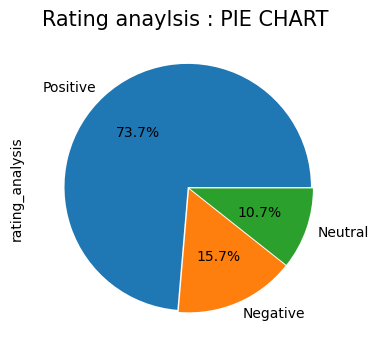

In [21]:
plt.figure(figsize=(10,4))
data['rating_analysis'].value_counts().plot(kind='pie',explode=[0.01,0.01,0.01],autopct='%.1f%%')
plt.title('Rating anaylsis : PIE CHART ',size=15)
plt.show()

In [22]:
data.isnull().sum()

Review             0
Rating             0
rating_analysis    0
dtype: int64

In [23]:
count=data.isnull().sum().sort_values(ascending=True)
count

Review             0
Rating             0
rating_analysis    0
dtype: int64

There is no such null values with respect to the rating.
Hence,the dataset has no null values and data is cleaned.

## Exploratory Data Analysis

###  Tokenization

In [24]:

def clean_data(text):
        text=text.lower()
        text=re.sub("\[.*?\]","",text)
        text=re.sub('\S*https?:\S*',"",text)
        text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
        text=re.sub("\w*\d\w*","",text)
        text=re.sub("\n","",text)
        text=re.sub(' +', " ", text)
        return text



clean=lambda x : clean_data(x)

In [25]:
data['clean_review']=data['Review'].apply(clean)
data

,Review,Rating,rating_analysis,clean_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms not experience hotel monaco seattle...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm not ca nt ...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok just looks nice modern outside desk staff n...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...


### Data is cleaned

Text(0.5, 1.0, 'Word Frequency before removing stop words')

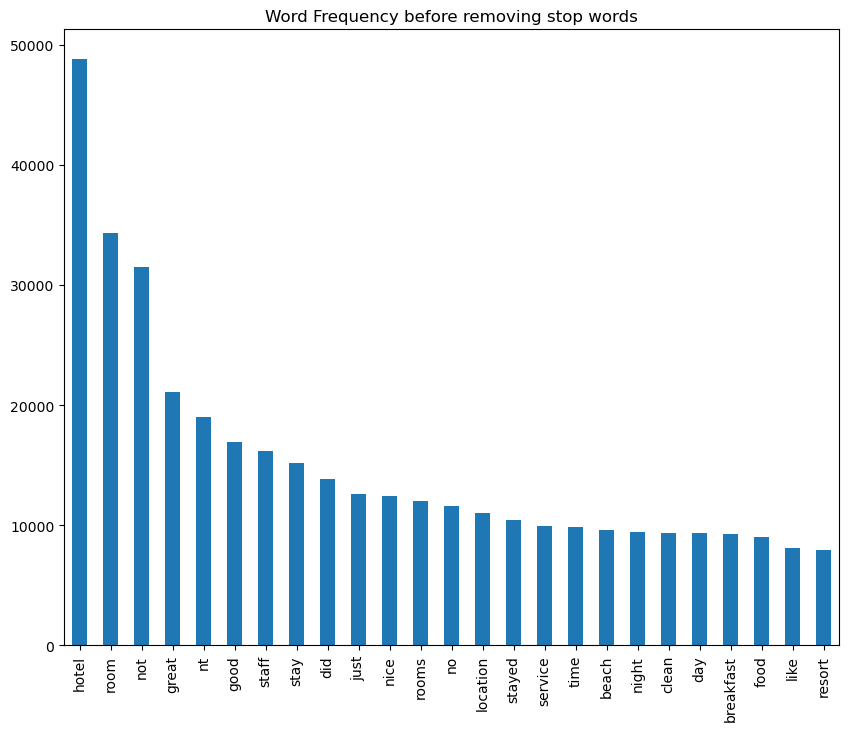

In [26]:
# word frequency before removing stopwords
word_freq=pd.Series(''.join(data['clean_review']).split()).value_counts()[:25]
word_freq.plot(kind='bar',figsize=(10,8))
plt.title('Word Frequency before removing stop words')

In [27]:
stop=stopwords.words('english')
my_stop=pd.Series(stop)
my_stop

0               a
1           about
2           above
3           after
4           again
          ...    
193        you're
194         yours
195      yourself
196    yourselves
197        you've
Length: 198, dtype: object

In [28]:
data['clean_review']=data['clean_review'].apply(lambda x : " ".join(x for x in x.split() if x not in list(my_stop)))
data

,Review,Rating,rating_analysis,clean_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok looks nice modern outside desk staff nt par...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...


Text(0.5, 1.0, '25 Most Frequent Words After Removing Stopwords')

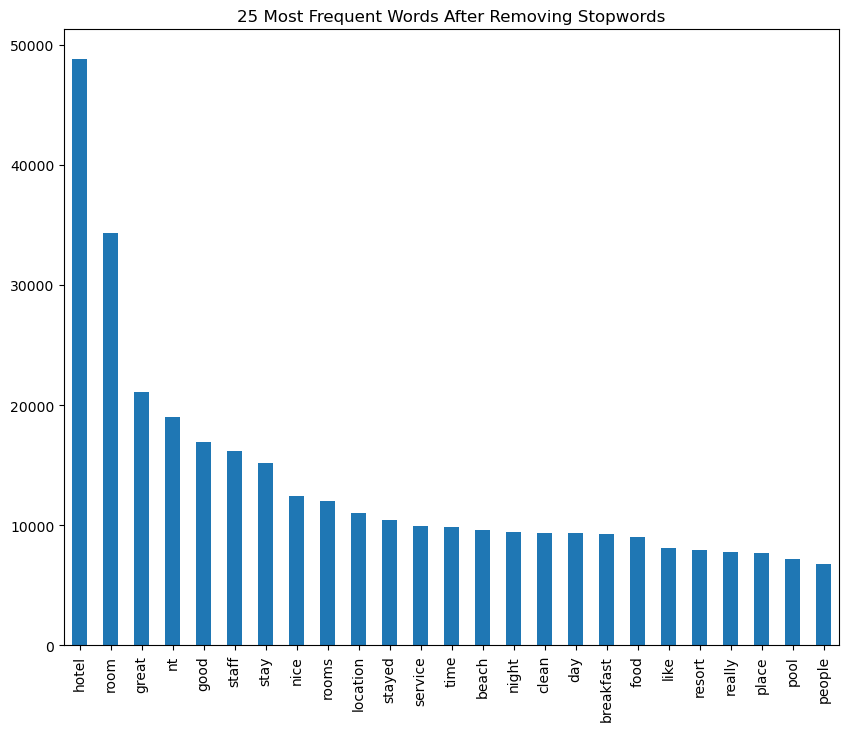

In [29]:
word_freq1=pd.Series(' '.join(data['clean_review']).split()).value_counts()[:25]
word_freq1.plot(kind='bar',figsize=(10,8))
plt.title('25 Most Frequent Words After Removing Stopwords')

From the chart we can conclude that the all stop words has been removed from the data

### Lemmatization

In [30]:
lemmatizer=WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [31]:
def lemmatize(txt):
    list_review=[lemmatizer.lemmatize(word=word, pos=tag[0].lower()) 
                 if tag[0].lower() in ['a','r','n','v'] else word for word, tag in pos_tag(w_tokenizer.tokenize(txt))]
    return (' '.join([x for x in list_review if x]))

In [32]:

data['Lemmatize_review']=data['clean_review'].apply(lambda x :lemmatize(x))

In [33]:
data

,Review,Rating,rating_analysis,clean_review,Lemmatize_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...
...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,best kept secret time staying charm ca nt beat...,best kept secret time stay charm ca nt beat ti...
20487,great location price view hotel great quick pl...,4,Positive,great location price view hotel great quick pl...,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,ok looks nice modern outside desk staff nt par...,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,hotel theft ruined vacation hotel opened sept ...,hotel theft ruin vacation hotel open sept gues...


Review before Lemmitization

In [34]:
data['clean_review'][1000]

'shame hotel wasnt good restaurant arrived clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually managed sorted shown room floor room suite tried make separate living room putting curtain inbetween bedroom living room bathroom tiny dirty stayed mum unfortunatley night didnt feel suffering bad foot decided phone reception ask doctor come hotel told ther wasnt local receptionist closest told phone eventually decided hospital safe came hospital evening doormen talking girls outside let following night ate hotel restaurant aisa cuba fantastic think hotel intrest restaurant bar end day sleeping ignored wouldnt stay'

In [35]:
nltk.download('punkt')
len(word_tokenize(data['clean_review'][1000]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bandh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


93

In [36]:
len(data['clean_review'][1000])

655

Check for the length of words after lemmitization

Review after lemiitization

In [37]:
data['Lemmatize_review'][1000]

'shame hotel wasnt good restaurant arrive clift late afternoon struggle luggage bags reception staff unhelpful uninterested eventually manage sort show room floor room suite try make separate living room put curtain inbetween bedroom living room bathroom tiny dirty stay mum unfortunatley night didnt feel suffer bad foot decide phone reception ask doctor come hotel tell ther wasnt local receptionist closest tell phone eventually decide hospital safe come hospital even doorman talk girl outside let follow night ate hotel restaurant aisa cuba fantastic think hotel intrest restaurant bar end day sleep ignore wouldnt stay'

In [38]:
len(word_tokenize(data['Lemmatize_review'][1000]))

93

In [39]:
len(data['Lemmatize_review'][1000])

623

As we can see after applying lemmitization ;
1) Number of charcaters have been reduced from 655 to 623

2) Number of words in review has been retained 

3) They are converted to their base/root/stem/words

### View at lemmitized data with respect to ratings

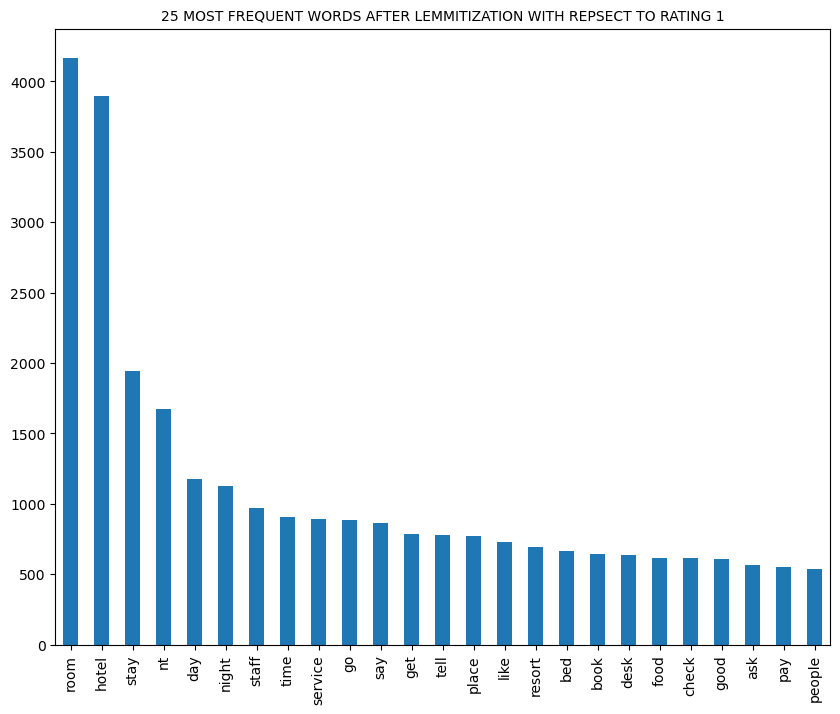

In [40]:
rating=pd.Series(' '.join(data[data['Rating']==1]['Lemmatize_review']).split()).value_counts()[:25]
rating.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 1',size=10)
plt.show()

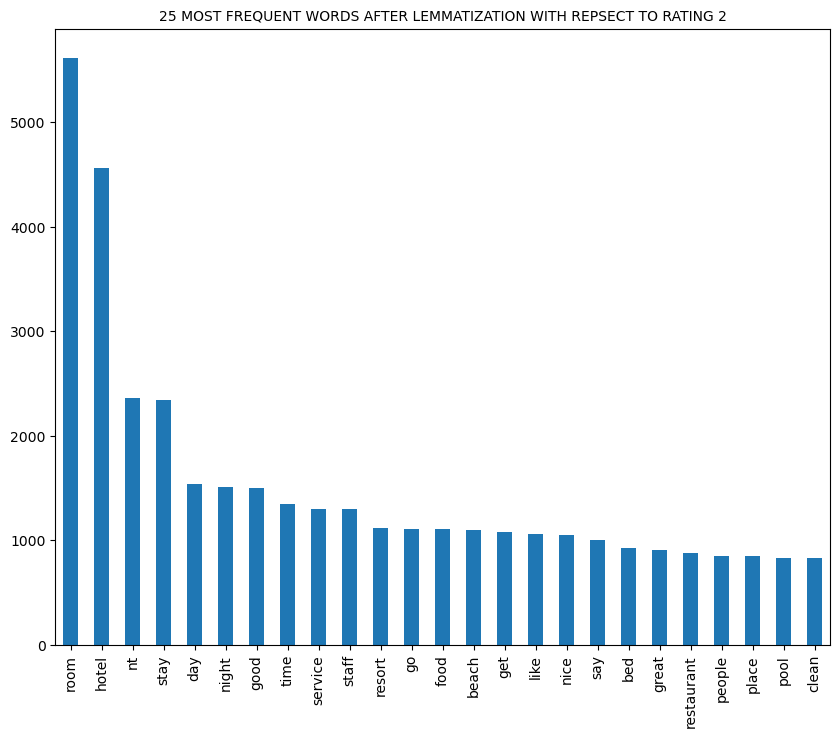

In [41]:
rating_second=pd.Series(' '.join(data[data['Rating']==2]['Lemmatize_review']).split()).value_counts()[:25]
rating_second.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMATIZATION WITH REPSECT TO RATING 2',size=10)
plt.show()

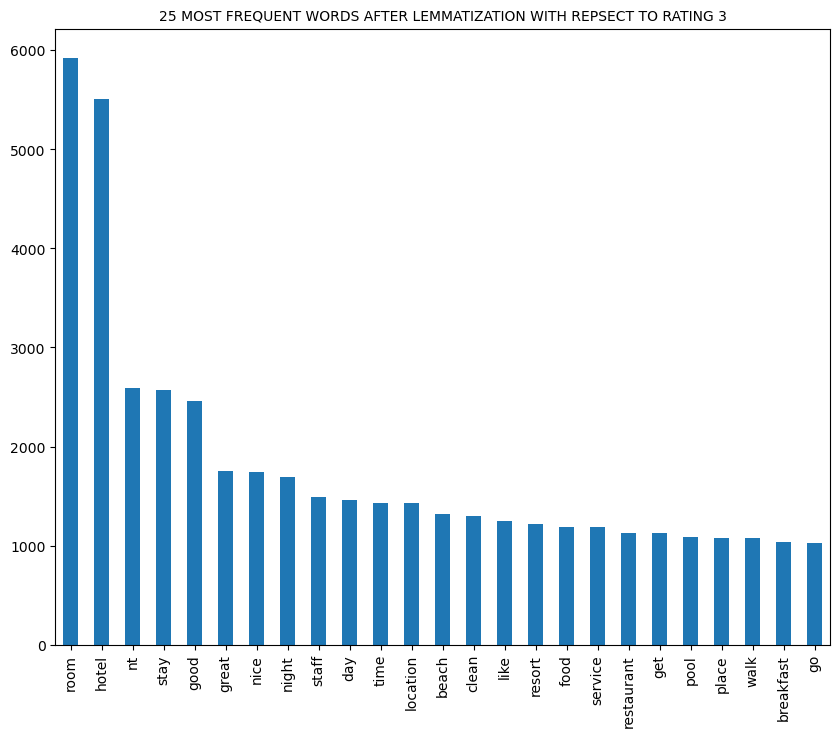

In [42]:
rating_second=pd.Series(' '.join(data[data['Rating']==3]['Lemmatize_review']).split()).value_counts()[:25]
rating_second.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMATIZATION WITH REPSECT TO RATING 3',size=10)
plt.show()

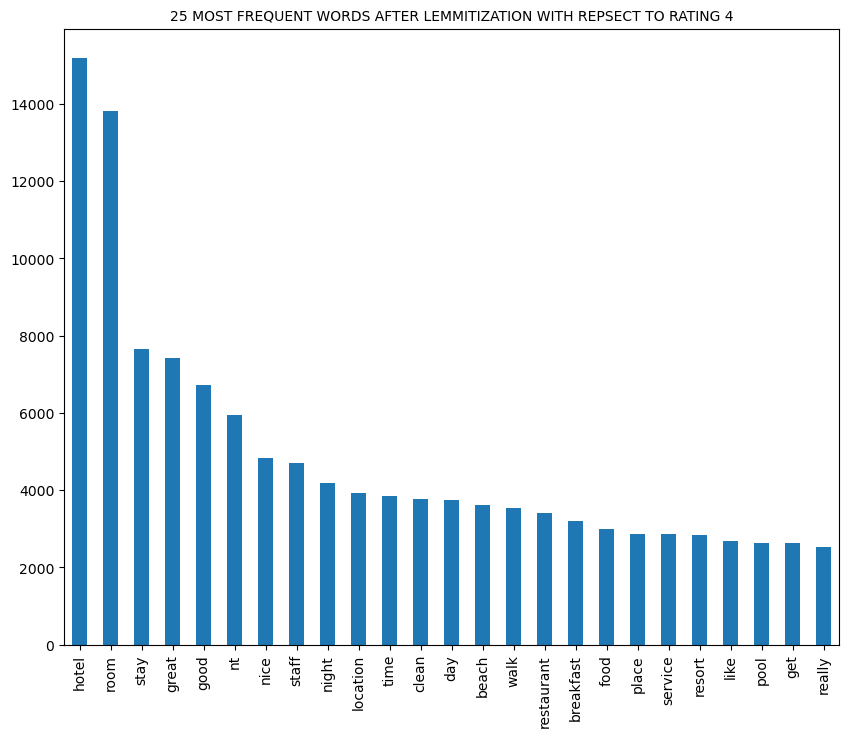

In [43]:
rating_fourth=pd.Series(' '.join(data[data['Rating']==4]['Lemmatize_review']).split()).value_counts()[:25]
rating_fourth.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMITIZATION WITH REPSECT TO RATING 4',size=10)
plt.show()

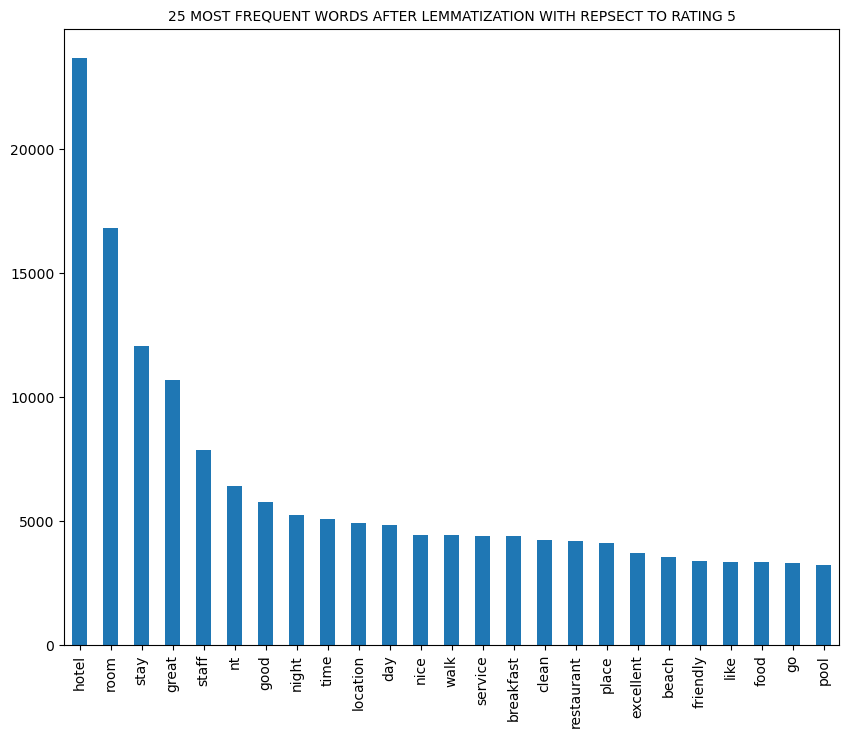

In [44]:
rating_fifth=pd.Series(' '.join(data[data['Rating']==5]['Lemmatize_review']).split()).value_counts()[:25]
rating_fifth.plot(kind='bar',figsize=(10,8))
plt.title('25 MOST FREQUENT WORDS AFTER LEMMATIZATION WITH REPSECT TO RATING 5',size=10)
plt.show()

In [45]:
# saving the clean data into a  csv file 
data.to_csv('hotel.csv')

In [46]:
text=pd.read_csv('hotel.csv',encoding='latin1',index_col=[0])
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmatize_review
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...


### Sentiment Analysis using textblob

In [47]:
from textblob import TextBlob

In [48]:
def sentiment_analysis_textblob(text):
    sentiment=TextBlob(text).sentiment
    return pd.Series([sentiment.subjectivity,sentiment.polarity])

In [49]:
text[['subjectivity','polarity']]=data['Lemmatize_review'].apply(lambda x :sentiment_analysis_textblob(x))
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmatize_review,subjectivity,polarity
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.680702,0.499561
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308


In [50]:
def sentiment_polarity(score):
    if score> 0:
        return('Positive')
    elif score == 0:
        return ('Neutral')
    else:
        return 'Negative'

        

        
text['sentiment_polarity']=text['polarity'].apply(lambda x :sentiment_polarity(x))
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmatize_review,subjectivity,polarity,sentiment_polarity
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.680702,0.499561,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308,Positive


In [51]:
text['sentiment_polarity'].value_counts()

Positive    19326
Negative     1139
Neutral        26
Name: sentiment_polarity, dtype: int64

In [52]:
text.describe()

,Rating,subjectivity,polarity
count,20491.000000,20491.000000,20491.000000
mean,3.952223,0.588598,0.281679
std,1.233030,0.101138,0.176616
min,1.000000,0.000000,-1.000000
25%,3.000000,0.525000,0.186074
50%,4.000000,0.584259,0.287363
75%,5.000000,0.650000,0.387500
max,5.000000,1.000000,1.000000


<AxesSubplot:xlabel='polarity', ylabel='Count'>

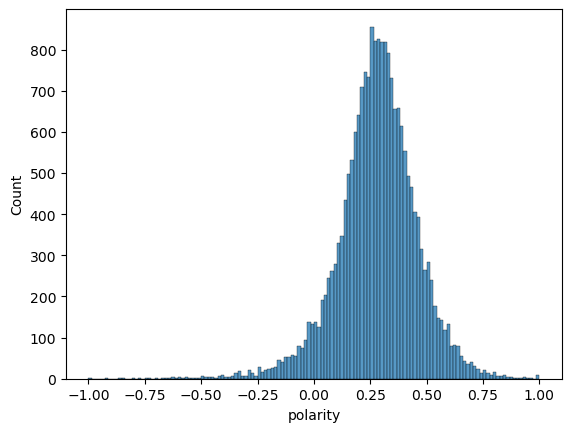

In [53]:
sns.histplot(text.polarity)
#plt.title('Polarity')

### Finding Number of Characters

In [54]:
text['no_of_char']=text['Lemmatize_review'].apply(lambda x:len(x))
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmatize_review,subjectivity,polarity,sentiment_polarity,no_of_char
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804,Positive,521
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550,Positive,1521
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429,Positive,1271
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.680702,0.499561,Positive,542
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308,Positive,1109


In [55]:
text['no_of_char'].describe().round(2)

count    20491.00
mean       649.36
std        610.86
min         32.00
25%        307.00
50%        483.00
75%        772.00
max      12091.00
Name: no_of_char, dtype: float64

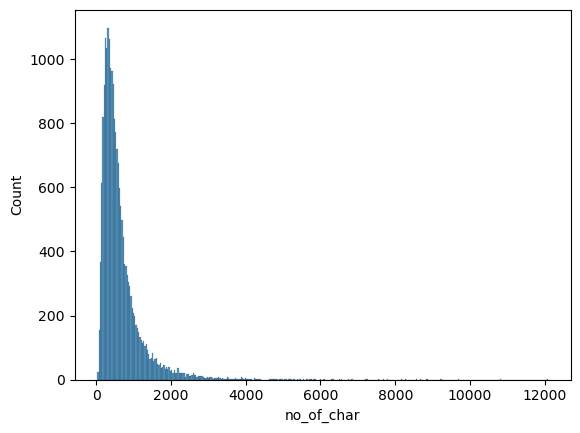

In [56]:
#plt.figure(figsize=(20,4))
sns.histplot(text['no_of_char'])
plt.show()

### Finding Number of words

In [57]:
text['no_of_words']=text['Lemmatize_review'].apply(lambda x :len(x.split(" ")))

In [58]:
text.head()

,Review,Rating,rating_analysis,clean_review,Lemmatize_review,subjectivity,polarity,sentiment_polarity,no_of_char,no_of_words
0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...,0.678095,0.198804,Positive,521,80
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,0.539858,0.248550,Positive,1521,228
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...,0.591954,0.321429,Positive,1271,195
3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...,0.680702,0.499561,Positive,542,85
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...,0.637088,0.467308,Positive,1109,178


In [59]:
text['no_of_words'].describe().round(2)

count    20491.00
mean        97.63
std         93.32
min          6.00
25%         46.00
50%         72.00
75%        116.00
max       1847.00
Name: no_of_words, dtype: float64

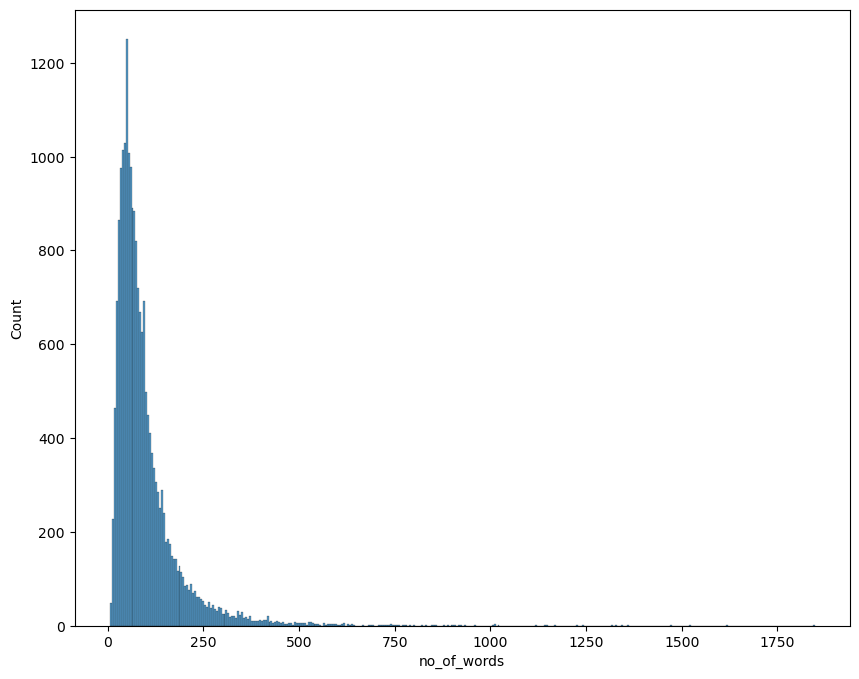

In [60]:
plt.figure(figsize=(10,8))
sns.histplot(x=text['no_of_words'])
plt.show()

### Most positive review

In [61]:
df_positive=text[text['no_of_words']>100].sort_values("polarity",ascending
                                                      =False)[["Lemmatize_review","Rating","sentiment_polarity"]]

In [62]:
df_positive.head(1)

,Lemmatize_review,Rating,sentiment_polarity
4731,brilliant berlin recently take city break berl...,5,Positive


In [63]:
text['Review'][4731]

"brilliant berlin recently took city break berlin couple friends stayed hilton, great choice turned, booked executive rooms excellent, tanya check n't helpful.the lounge perfect spot r r long day siteseeing, looks pictureque gendarmenmarkt beautiful cathedrals, breakfast lounge continental style buffet style breakfast main dining area fantastic, dinner brandenberg restaurant attached hotel superb, waiting staff attentive food delightful, marks service, hotel opinion ideally located exploring city stadmitte u bahn station literally door.we highly recommend hotel, recommend berlin walking tour commences starbucks brandenberg gate 1.15pm afternoon refugium restaurant french cathedral gendarmenmarkt, superb food excellent service, try hiring bike day tour sites tiergarten, concierge arranged matter minutes door 15 euro day,  "

### Most negative review

In [64]:
df_negative=text[text['no_of_words']>100].sort_values("polarity",ascending
                                                      =True)[["Lemmatize_review","Rating","polarity"]]

In [65]:
df_negative.head(1)

,Lemmatize_review,Rating,polarity
2498,terrible service nt stay friend decide stay ho...,1,-0.462205


In [66]:
text['Review'][2498]

"terrible service n't stay, friend decided stay hotel reading review new york times, unfortunately stay turned horrible experience.on day hotel asked desk book tour following evening, assured taken care, morning dropped desk check status tour told not booked report lobby evening tour, came evening told tour booked angry disappointed having plans fall decided try, asked desk book tour day, time tour booked desk quoted wrong price repeatedly, told cost 110 checked twice make sure correct end tour guide told cost tour 110 person, felt disgusted let incompetence hotel desk.in addition went desk make known bad experiences encountered couple hotel lost luggage forgetting room brought, room-by-room search locate luggage, people encountered allocated room allocated, incompetence terribly unseemly hotel positive reviews various places.the final insult asked manager make concerns known manager question treated utmost disrespect brushing comments not taking seriously, response want book hotel con

### N-GRAM 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
def top_n_words(df,n=None,n_gram=None):
    count=CountVectorizer(max_features=2000,ngram_range=n_gram).fit(df)
    bag_of_words=count.transform(df)
    sum_of_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_of_words[0,idx])for word,idx  in count.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x :x[1],reverse=True)
    return word_freq[:n]

### B-Gram

In [69]:
pos=text[text['sentiment_polarity']=='Positive']
neg=text[text['sentiment_polarity']=='Negative']

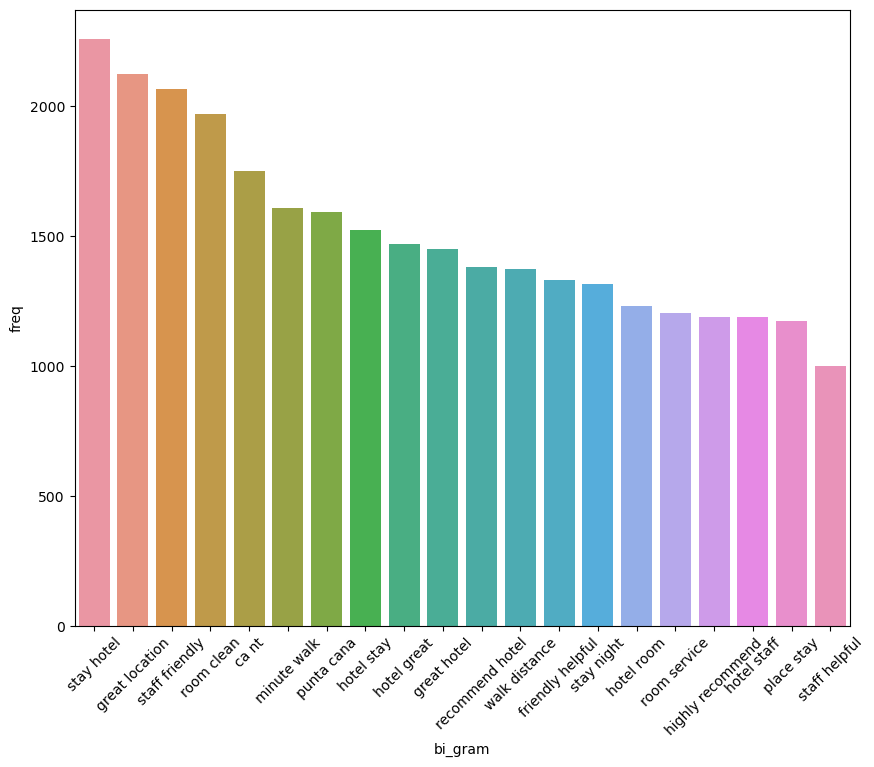

In [70]:
top_20_bigrams_pos=top_n_words(pos['Lemmatize_review'],n=20,n_gram=(2,2))
top_20_bigrams_pos=pd.DataFrame(top_20_bigrams_pos,columns=['bi_gram','freq'])
plt.figure(figsize=(10,8))
fig=sns.barplot(x='bi_gram',y='freq',data=top_20_bigrams_pos)
fig.set_xticklabels(rotation=45,labels=top_20_bigrams_pos['bi_gram'])
plt.show()

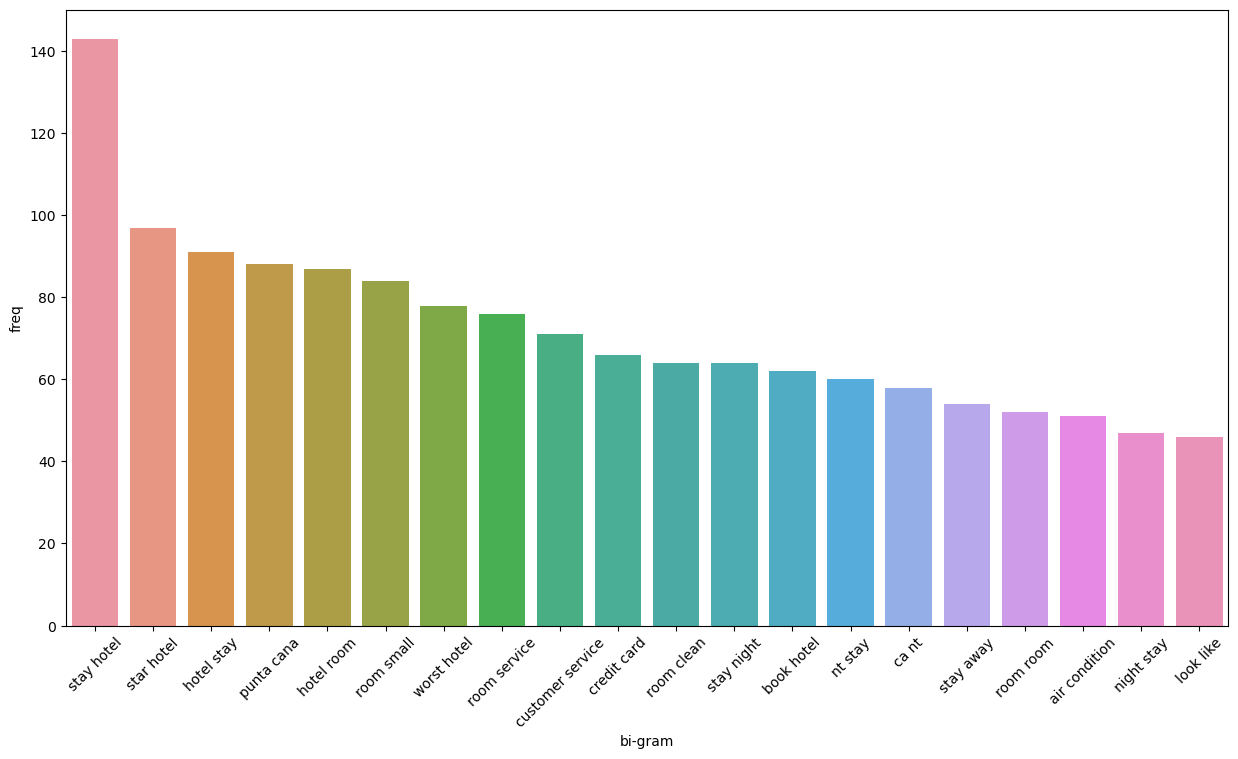

In [71]:
top_20_neg_bigram=top_n_words(neg['Lemmatize_review'],n=20,n_gram=(2,2))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['bi-gram','freq'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='bi-gram',y='freq',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['bi-gram'])
plt.show()

### TRI-GRAM

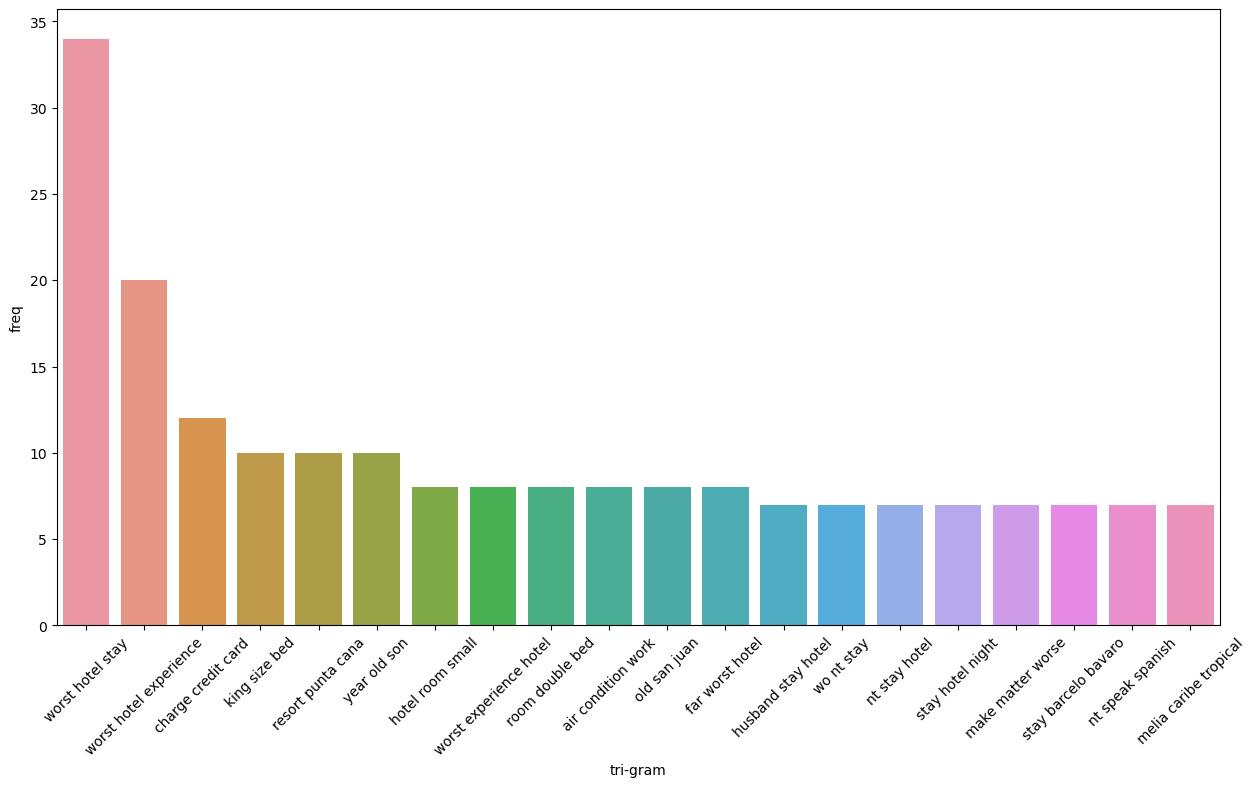

In [72]:
top_20_neg_bigram=top_n_words(neg['Lemmatize_review'],n=20,n_gram=(3,3))
top_20_neg_bigram=pd.DataFrame(top_20_neg_bigram,columns=['tri-gram','freq'])
plt.figure(figsize=(15,8))
fig=sns.barplot(x='tri-gram',y='freq',data=top_20_neg_bigram)
fig.set_xticklabels(rotation=45,labels=top_20_neg_bigram['tri-gram'])
plt.show()

### WORDCLOUD

In [73]:
from wordcloud import WordCloud

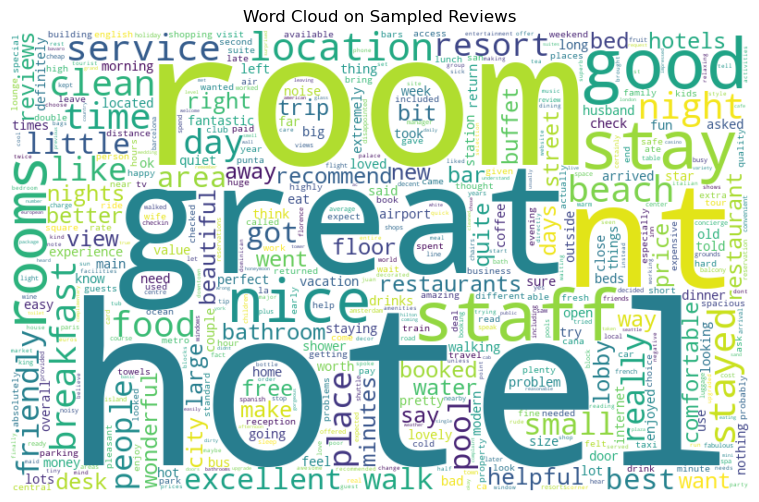

In [89]:
import random
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#--- SAMPLE A MANAGEABLE PORTION OF DATA ---
# Adjust sample size based on your system capacity
sample_size = min(5000, len(text))  # e.g., 5,000 reviews
sampled_reviews = random.sample(list(text['clean_review']), sample_size)

#--- TOKENIZE AND COUNT FREQUENCIES ---
tokens = []
for review in sampled_reviews:
    tokens.extend(re.findall(r'\w+', review.lower()))  # tokenize each review

# Count frequencies of the most common words
freq = dict(Counter(tokens).most_common(500))  # top 500 words only

#--- GENERATE THE WORD CLOUD ---
word_cloud = WordCloud(
    width=800,
    height=500,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=500
).generate_from_frequencies(freq)

#--- PLOT THE WORD CLOUD ---
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud on Sampled Reviews')
plt.show()
plt.close()


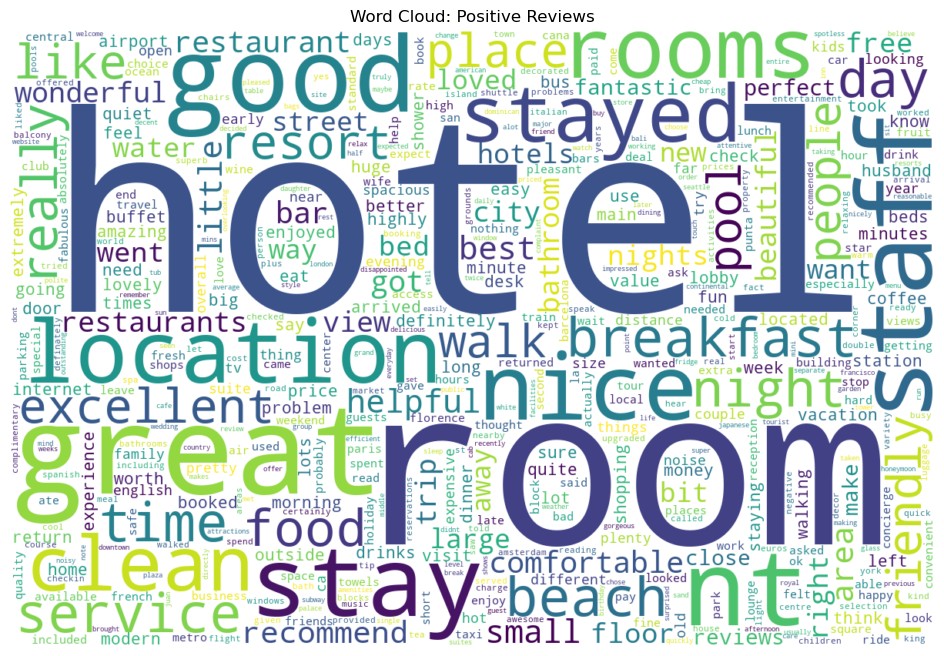

In [88]:

text = pd.read_csv('hotel.csv')

#--- FILTER POSITIVE REVIEWS ---
positive_reviews = text.loc[text['rating_analysis'] == 'Positive', 'clean_review']

#--- SAMPLE REVIEWS TO AVOID MEMORY ISSUES ---
sample_size = min(5000, len(positive_reviews))  # adjust size if needed
sampled_reviews = random.sample(list(positive_reviews), sample_size)

#--- TOKENIZE AND COUNT FREQUENCIES ---
tokens = []
for review in sampled_reviews:
    tokens.extend(re.findall(r'\w+', review.lower()))

freq = dict(Counter(tokens).most_common(500))  # top 500 frequent words

# --- GENERATE THE WORD CLOUD ---
word_cloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=500
).generate_from_frequencies(freq)

# -- PLOT THE WORD CLOUD ---
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Positive Reviews')
plt.show()
plt.close()

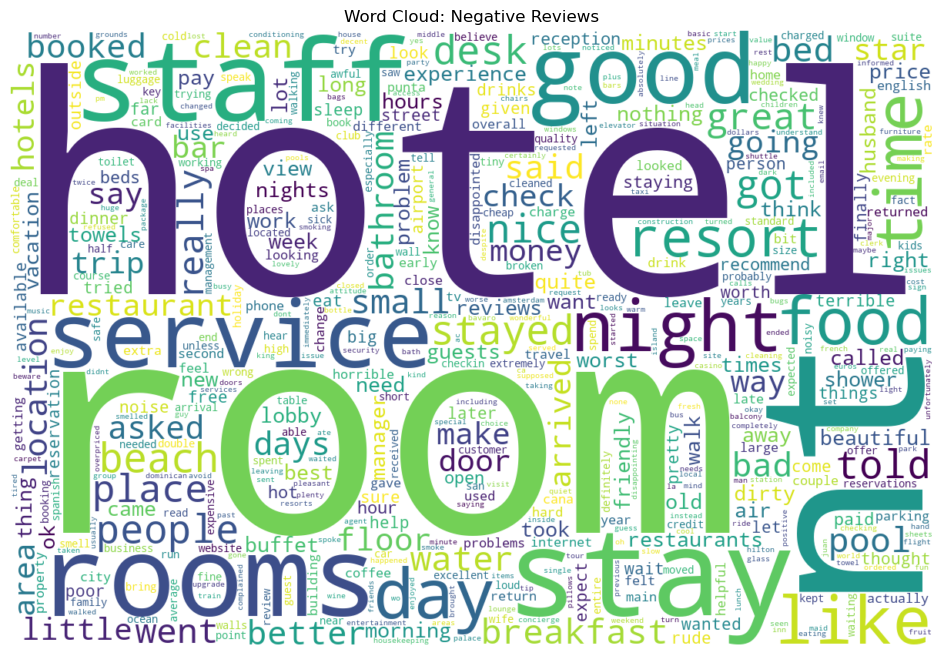

In [90]:
#--- FILTER NEGATIVE REVIEWS ---
negative_reviews = text.loc[text['rating_analysis'] == 'Negative', 'clean_review']

#--- SAMPLE REVIEWS TO PREVENT MEMORY ERRORS ---
sample_size = min(5000, len(negative_reviews))  # Adjust lower if your system still struggles
sampled_reviews = random.sample(list(negative_reviews), sample_size)

#--- TOKENIZE AND COUNT WORD FREQUENCIES ---
tokens = []
for review in sampled_reviews:
    tokens.extend(re.findall(r'\w+', review.lower()))

freq = dict(Counter(tokens).most_common(500))  # Take top 500 words

#--- GENERATE THE WORD CLOUD ---
word_cloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    stopwords=STOPWORDS,
    max_words=500
).generate_from_frequencies(freq)

#--- PLOT THE WORD CLOUD ---
plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Negative Reviews')
plt.show()
plt.close()

In [91]:
# saving data into csv for model buiding pov
text.to_csv('text.csv')

### Loading the data

In [92]:
text=pd.read_csv('text.csv',index_col=[0])
text.head()

,Unnamed: 0,Review,Rating,rating_analysis,clean_review,Lemmatize_review
0,0,nice hotel expensive parking got good deal sta...,4,Positive,nice hotel expensive parking got good deal sta...,nice hotel expensive parking get good deal sta...
1,1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,nice room experience hotel monaco seattle good...
3,3,"unique, great stay, wonderful time hotel monac...",5,Positive,unique great stay wonderful time hotel monaco ...,unique great stay wonderful time hotel monaco ...
4,4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great stay went seahawk game awesom...,great stay great stay go seahawk game awesome ...


## Tf-ID Vectorizor

In [109]:
text['sentiment_polarity'].isnull().sum()

0

In [110]:
text = text.dropna(subset=['sentiment_polarity', 'clean_review'])

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tf=TfidfVectorizer()

In [112]:
x_train_df=tf.fit(text['clean_review'])

In [113]:
x_train=x_train_df.transform(text['clean_review'])

In [114]:
text['sentiment_polarity'] = text['rating_analysis'].map({'Positive':1, 'Negative':0})
X_train,X_test,y_train,y_test=train_test_split(x_train,text['sentiment_polarity'],random_state=30,test_size=0.3,shuffle=True)

In [115]:
X_train.shape,X_test.shape

((12814, 69666), (5493, 69666))

In [116]:
y_train.shape,y_test.shape

((12814,), (5493,))

In [117]:
# defined a function for accuracy
def Accuracy(y_train,y_train_pred,y_test,y_test_pred):
    print('Train Accuracy\n')
    print(classification_report(y_train,y_train_pred))
    print('\n',confusion_matrix(y_train,y_train_pred))
    print('\n',accuracy_score(y_train,y_train_pred))
    print('*'*100)
    print('Test Accuracy\n')
    print(classification_report(y_test,y_test_pred))
    print('\n',confusion_matrix(y_test,y_test_pred))
    print('\n',accuracy_score(y_test,y_test_pred)) 

## Model Building 

## Decision tree classifier

In [118]:
model_decision=DecisionTreeClassifier(random_state=0)

In [119]:
model_decision.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [120]:
train_pred=model_decision.predict(X_train)
test_pred=model_decision.predict(X_test)

In [121]:
decison_tree=Accuracy(train_pred,y_train,test_pred,y_test)
decison_tree

Train Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2232
           1       1.00      1.00      1.00     10582

    accuracy                           1.00     12814
   macro avg       1.00      1.00      1.00     12814
weighted avg       1.00      1.00      1.00     12814


 [[ 2232     0]
 [    0 10582]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       999
           1       0.91      0.92      0.91      4494

    accuracy                           0.86      5493
   macro avg       0.76      0.76      0.76      5493
weighted avg       0.86      0.86      0.86      5493


 [[ 604  395]
 [ 378 4116]]

 0.859275441470963


## Logistic Model

In [122]:
log=LogisticRegression()

In [123]:
log.fit(X_train,y_train)

LogisticRegression()

In [124]:
log_train=log.predict(X_train)
log_test=log.predict(X_test)

In [125]:
logistic_model=Accuracy(log_train,y_train,log_test,y_test)
logistic_model

Train Accuracy

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1822
           1       1.00      0.96      0.98     10992

    accuracy                           0.96     12814
   macro avg       0.90      0.97      0.93     12814
weighted avg       0.97      0.96      0.96     12814


 [[ 1782    40]
 [  450 10542]]

 0.9617605743717809
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       712
           1       0.99      0.94      0.97      4781

    accuracy                           0.94      5493
   macro avg       0.85      0.95      0.89      5493
weighted avg       0.96      0.94      0.95      5493


 [[ 686   26]
 [ 296 4485]]

 0.9413799381030402


## Random Forest

In [126]:
random=RandomForestClassifier(max_features=400)

In [127]:
random.fit(X_train,y_train)

RandomForestClassifier(max_features=400)

In [128]:
rf_train=random.predict(X_train)
rf_test=random.predict(X_test)

In [129]:
random_forest=Accuracy(rf_train,y_train,rf_test,y_test)
random_forest

Train Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2232
           1       1.00      1.00      1.00     10582

    accuracy                           1.00     12814
   macro avg       1.00      1.00      1.00     12814
weighted avg       1.00      1.00      1.00     12814


 [[ 2232     0]
 [    0 10582]]

 1.0
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.39      0.98      0.56       387
           1       1.00      0.88      0.94      5106

    accuracy                           0.89      5493
   macro avg       0.69      0.93      0.75      5493
weighted avg       0.96      0.89      0.91      5493


 [[ 381    6]
 [ 601 4505]]

 0.8894957218277808


## SVM (Support Vector Machine)

In [130]:
svc=SVC()

In [131]:
svc.fit(X_train,y_train)

SVC()

In [132]:
svctrain=svc.predict(X_train)
svctest=svc.predict(X_test)

In [133]:
support_vector_machine=Accuracy(svctrain,y_train,svctest,y_test)
support_vector_machine

Train Accuracy

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2203
           1       1.00      1.00      1.00     10611

    accuracy                           1.00     12814
   macro avg       0.99      1.00      1.00     12814
weighted avg       1.00      1.00      1.00     12814


 [[ 2200     3]
 [   32 10579]]

 0.9972686124551272
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       781
           1       0.99      0.95      0.97      4712

    accuracy                           0.95      5493
   macro avg       0.87      0.95      0.91      5493
weighted avg       0.96      0.95      0.95      5493


 [[ 744   37]
 [ 238 4474]]

 0.9499362825414164


## KNN Classifier

In [134]:
k=KNeighborsClassifier(n_neighbors=35)

In [135]:
k.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [136]:
ktrain_pred=k.predict(X_train)
ktest_pred=k.predict(X_test)

In [137]:
k_near=Accuracy(ktrain_pred,y_train,ktest_pred,y_test)
k_near

Train Accuracy

              precision    recall  f1-score   support

           0       0.29      0.96      0.44       672
           1       1.00      0.87      0.93     12142

    accuracy                           0.87     12814
   macro avg       0.64      0.92      0.69     12814
weighted avg       0.96      0.87      0.90     12814


 [[  646    26]
 [ 1586 10556]]

 0.874200093647573
****************************************************************************************************
Test Accuracy

              precision    recall  f1-score   support

           0       0.29      0.97      0.44       290
           1       1.00      0.87      0.93      5203

    accuracy                           0.87      5493
   macro avg       0.64      0.92      0.68      5493
weighted avg       0.96      0.87      0.90      5493


 [[ 280   10]
 [ 702 4501]]

 0.8703804842526852


----Logistic is the final model as it is giving good accuracy than other models (with training accuracy 97 and testing accuracy 96)-----

In [138]:
##Make predictions on the test set

# Decision Tree
dt_pred = model_decision.predict(X_test)

# Logistic Regression
log_pred = log.predict(X_test)

# Random Forest
rf_pred = random.predict(X_test)

# SVM
svm_pred = svc.predict(X_test)

# KNN
knn_pred = k.predict(X_test)

In [139]:
##Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

def evaluate_models(y_true, model_preds, model_names):
    results = []
    for name, pred in zip(model_names, model_preds):
        acc = accuracy_score(y_true, pred)
        report = classification_report(y_true, pred, output_dict=True)
        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision_Pos': report['1']['precision'],
            'Recall_Pos': report['1']['recall'],
            'F1_Pos': report['1']['f1-score'],
            'Precision_Neg': report['0']['precision'],
            'Recall_Neg': report['0']['recall'],
            'F1_Neg': report['0']['f1-score']
        })
    return pd.DataFrame(results)

# List of model predictions and names
preds = [dt_pred, log_pred, rf_pred, svm_pred, knn_pred]
names = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'SVM', 'KNN']

# Evaluate all models
evaluation_df = evaluate_models(y_test, preds, names)
evaluation_df

,Model,Accuracy,Precision_Pos,Recall_Pos,F1_Pos,Precision_Neg,Recall_Neg,F1_Neg
0,Decision Tree,0.859275,0.915888,0.912436,0.914159,0.604605,0.615071,0.609793
1,Logistic Regression,0.941380,0.938088,0.994236,0.965347,0.963483,0.698574,0.809917
2,Random Forest,0.889496,0.882295,0.998670,0.936883,0.984496,0.387984,0.556611
3,SVM,0.949936,0.949491,0.991798,0.970183,0.952625,0.757637,0.844016
4,KNN,0.870380,0.865078,0.997783,0.926704,0.965517,0.285132,0.440252


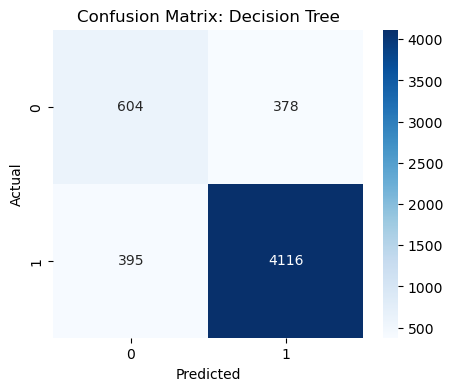

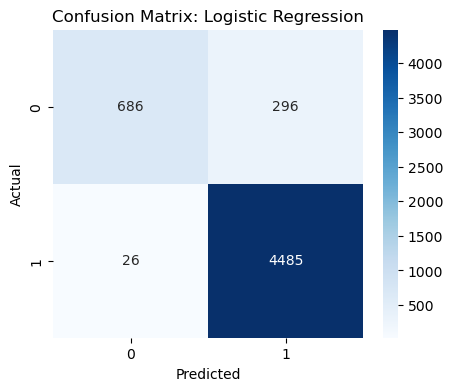

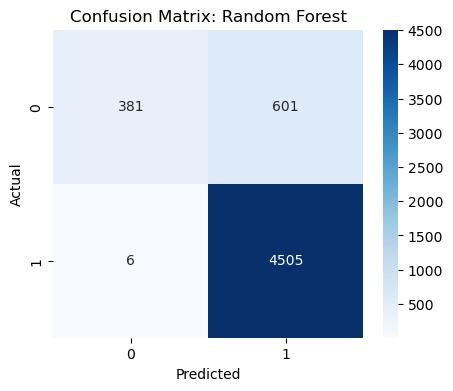

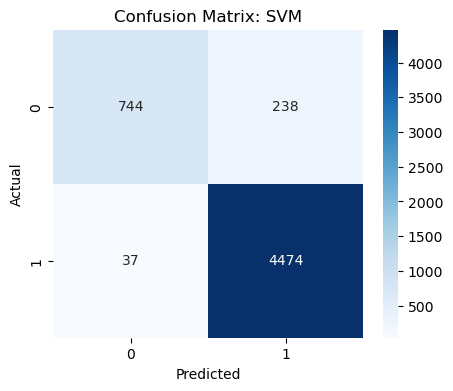

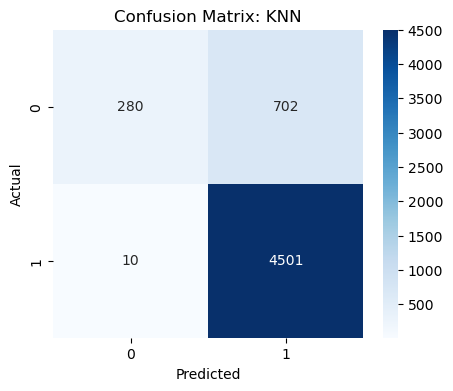

In [140]:
##Confusion Matrices

for name, pred in zip(names, preds):
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

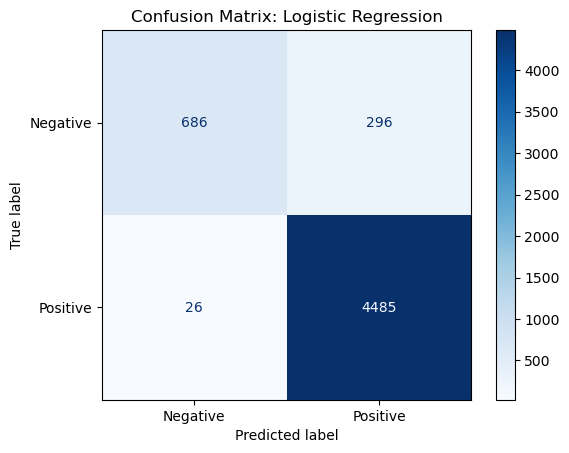

In [141]:
##True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

In [142]:
from sklearn.metrics import classification_report

print(classification_report(y_test, log_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.96      0.70      0.81       982
    Positive       0.94      0.99      0.97      4511

    accuracy                           0.94      5493
   macro avg       0.95      0.85      0.89      5493
weighted avg       0.94      0.94      0.94      5493



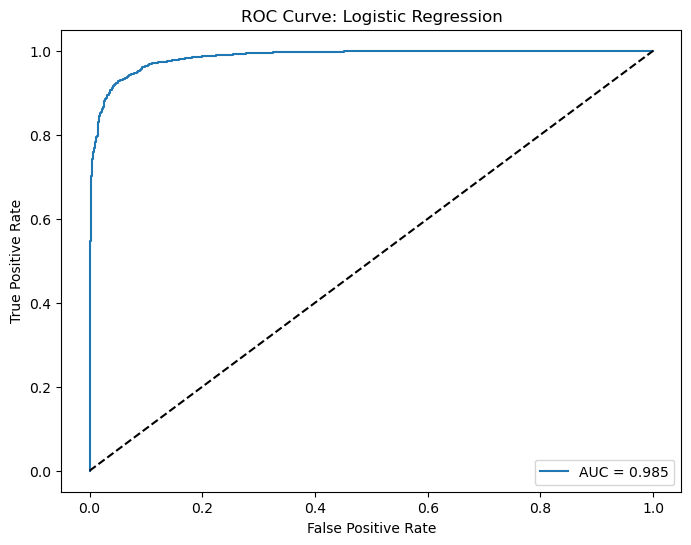

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = log.predict_proba(X_test)[:,1]  # Probability of Positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [144]:
##ROC Curve & AUC
##model’s ability to distinguish between Positive and Negative reviews
##AUC (Area Under Curve) → value close to 1 is good; 0.5 = random guessing

In [145]:
##Save the Model

In [146]:
import pickle

# Save the logistic regression model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(log, file)

# Save the TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tf, file)

In [147]:
#Load and Predict New Data
# Load model and vectorizer
with open('logistic_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    loaded_vectorizer = pickle.load(file)

# Example new review
new_review = ["The room was clean and staff were very helpful"]

# Transform the review
X_new = loaded_vectorizer.transform(new_review)

# Predict sentiment
pred = loaded_model.predict(X_new)
print("Predicted Sentiment:", "Positive" if pred[0]==1 else "Negative")

Predicted Sentiment: Positive
